In [51]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keyword

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")
dataset.head(5)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 1453 to 860
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1622 non-null   int64 
 1   price            1622 non-null   int64 
 2   mark             1622 non-null   object
 3   model            1622 non-null   object
 4   year             1622 non-null   int64 
 5   mileage          1622 non-null   int64 
 6   engine_capacity  1622 non-null   int64 
 7   transmission     1622 non-null   object
 8   drive            1622 non-null   object
 9   hand_drive       1622 non-null   object
dtypes: int64(5), object(5)
memory usage: 139.4+ KB


In [5]:
X_train["mark"].value_counts()

toyota           735
honda            282
nissan           216
mazda            101
suzuki            93
mitsubishi        39
daihatsu          39
subaru            36
volkswagen        33
bmw               23
hyundai            6
mercedes-benz      4
audi               2
kia motors         2
isuzu              2
land rover         2
volvo              1
jaguar             1
mitsuoka           1
peugeot            1
smart              1
hino               1
citroen            1
Name: mark, dtype: int64

Text(0, 0.5, 'price of cars')

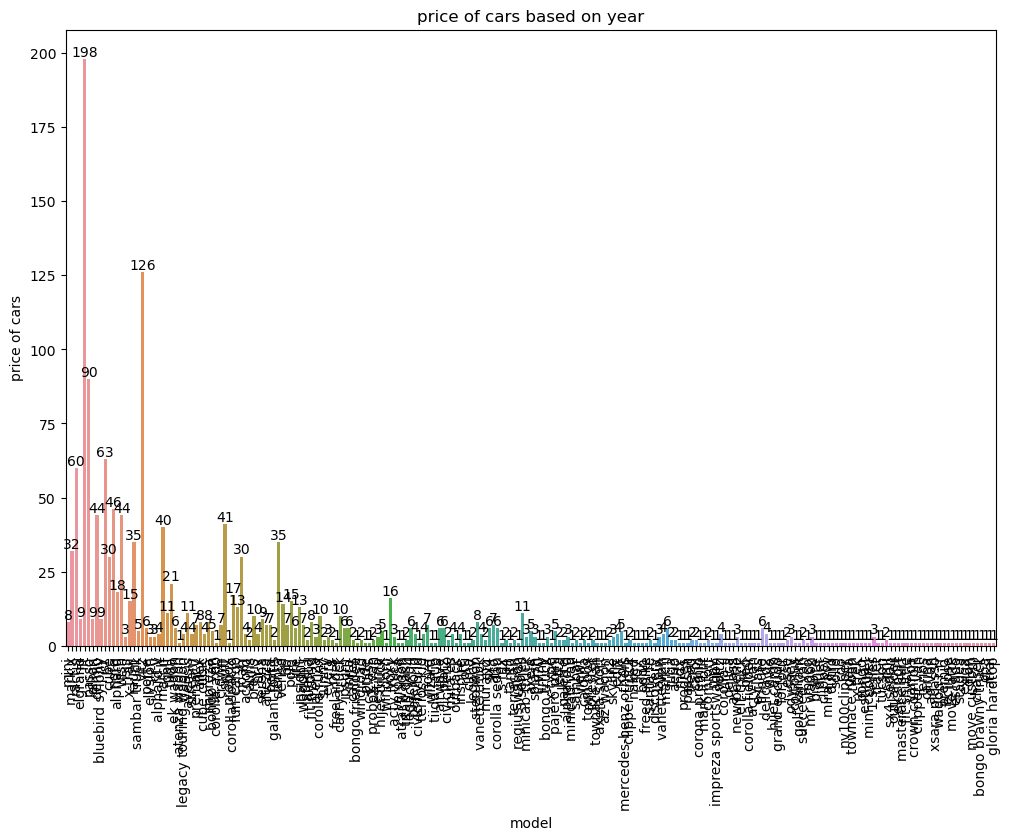

In [7]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'model', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("price of cars based on year")
plt.xlabel("model")
plt.ylabel("price of cars")

In [8]:
curr_time = datetime.datetime.now()
X_train['year'] = X_train['year'].apply(lambda x : curr_time.year - x)
X_test['year'] = X_test['year'].apply(lambda x : curr_time.year - x)

In [9]:
print(sum(X_train["mileage"].isnull()))
print(sum(X_test["mileage"].isnull()))

0
0


In [10]:

X_train["mileage"].fillna(X_train["mileage"].astype("float64").mean(), inplace = True)
X_test["mileage"].fillna(X_train["mileage"].astype("float64").mean(), inplace = True)

In [12]:
X_train["engine_capacity"].fillna(X_train["engine_capacity"].astype("float64").mean(), inplace = True)
X_test["engine_capacity"].fillna(X_train["engine_capacity"].astype("float64").mean(), inplace = True)

In [17]:
X_train = pd.get_dummies(X_train,
                         columns = ["model", "engine_capacity", "transmission"],
                         drop_first = True)

In [ ]:
X_test = pd.get_dummies(X_test,
                         columns = ["model", "engine_capacity", "transmission"],
                         drop_first = True)

In [24]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [92]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
input_1 = 'y_pred'
input_1 = float(input_1)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

ValueError: could not convert string to float: 'bmw'

ValueError: could not convert string to float: 'bmw'